In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')



In [3]:

print("🔹 train.head():")
print(train.head())


print("\n🔹 train.shape:")
print(train.shape)


print("\n🔹 train.info():")
print(train.info())


print("\n🔹 train.describe():")
print(train.describe())


print("\n🔹 Missing values (train.isna().sum()):")
print(train.isna().sum())


print("\n🔹 Unique values (train.nunique()):")
print(train.nunique())


🔹 train.head():
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4  

In [4]:
# Basic EDA in one cell


print("🔹 test.head():")
print(test.head())


print("\n🔹 test.shape:")
print(test.shape)


print("\n🔹 test.info():")
print(test.info())


print("\n🔹 test.describe():")
print(test.describe())


print("\n🔹 Missing values (test.isna().sum()):")
print(test.isna().sum())


print("\n🔹 Unique values (test.nunique()):")
print(test.nunique())


🔹 test.head():
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez  

🔹 test.shape:
(4277, 13)

🔹 test.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entri

In [5]:
df=pd.concat([train,test],sort=False)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.shape[0]==train.shape[0]+test.shape[0]

True

In [7]:
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [8]:
numerical=['Age','RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck']
categorical=['HomePlanet','CryoSleep','Destination','VIP']
mode = df[categorical].mode().iloc[0]
df[categorical] = df[categorical].fillna(mode)
median=df[numerical].median()
df[numerical]=df[numerical].fillna(median)
df.isna().sum()


/tmp/ipykernel_13/406238380.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical] = df[categorical].fillna(mode)


PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
dtype: int64

In [9]:
df = df.drop(columns=['Name'])


In [10]:
df[['Deck','Num','Side']]=df['Cabin'].str.split('/',expand=True)
df=df.drop(columns=['Cabin'])


In [11]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [12]:
df.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
Deck             299
Num              299
Side             299
dtype: int64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

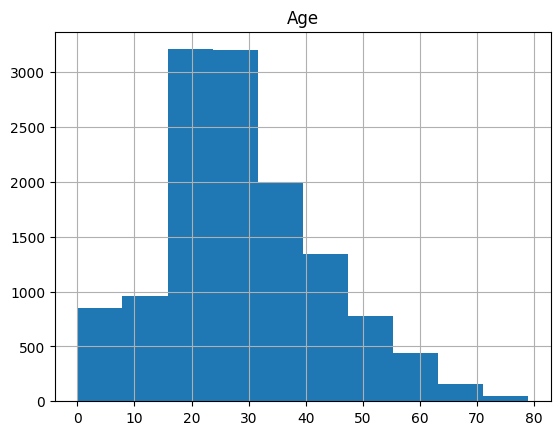

In [13]:
df.hist('Age')

In [14]:
labels=['Child','Teenagers','Adult','Older']
bins = [0, 12, 21, 45, 80]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Age_Group
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,Adult
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Adult
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,Older
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,Adult
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Teenagers


In [15]:
df=df.drop(columns='Age')


In [16]:
lbl=LabelEncoder()
categorical=["HomePlanet","CryoSleep","Destination","VIP","Deck","Num","Side","Age_Group","Transported"]
df[categorical]=df[categorical].apply(lbl.fit_transform)
df


,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Age_Group
0,0001_01,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
1,0002_01,0,0,2,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,0
2,0003_01,1,0,2,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,2
3,0003_02,1,0,2,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,0
4,0004_01,0,0,2,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,1,2,0,0.0,0.0,0.0,0.0,0.0,2,6,553,1,0
4273,9269_01,0,0,2,0,0.0,847.0,17.0,10.0,144.0,2,8,1894,2,0
4274,9271_01,2,1,0,0,0.0,0.0,0.0,0.0,0.0,2,3,1113,0,0
4275,9273_01,1,0,2,0,0.0,2680.0,0.0,0.0,523.0,2,3,1114,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  int64  
 2   CryoSleep     12970 non-null  int64  
 3   Destination   12970 non-null  int64  
 4   VIP           12970 non-null  int64  
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   12970 non-null  int64  
 11  Deck          12970 non-null  int64  
 12  Num           12970 non-null  int64  
 13  Side          12970 non-null  int64  
 14  Age_Group     12970 non-null  int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 1.6+ MB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePlanet,12970.0,0.655436,0.799855,0.0,0.00,0.0,1.00,2.0
CryoSleep,12970.0,0.353200,0.477983,0.0,0.00,0.0,1.00,1.0
Destination,12970.0,1.501465,0.810738,0.0,1.00,2.0,2.00,2.0
VIP,12970.0,0.021049,0.143552,0.0,0.00,0.0,0.00,1.0
RoomService,12970.0,218.378026,641.766201,0.0,0.00,0.0,42.75,14327.0
FoodCourt,12970.0,441.890979,1568.038076,0.0,0.00,0.0,62.75,29813.0
ShoppingMall,12970.0,170.779491,584.153630,0.0,0.00,0.0,23.00,23492.0
Spa,12970.0,301.722282,1118.746785,0.0,0.00,0.0,50.00,22408.0
VRDeck,12970.0,300.450270,1168.655639,0.0,0.00,0.0,36.00,24133.0
Transported,12970.0,0.997070,0.813938,0.0,0.00,1.0,2.00,2.0


**As we can see from above, variables like - RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck have outliers - since the mean and max values seem very far off. The Standard deviation for the same also shows this***
******

<Axes: >

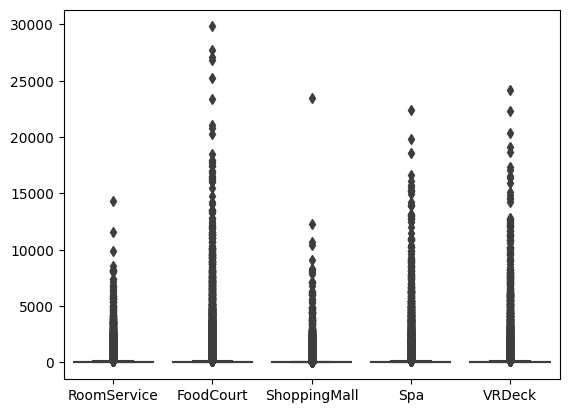

In [19]:
sns.boxplot(data=df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]])

In [20]:
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=q1, upper=q99)


In [21]:
y = df["Transported"].astype(int)

In [22]:
y=df.Transported  ##test
X=df.drop(["Transported", "PassengerId"], axis=1) ##train

In [23]:
y = y[y != 2]


In [24]:
y.value_counts()

Transported
1    4378
0    4315
Name: count, dtype: int64

In [25]:
y.info()

<class 'pandas.core.series.Series'>
Index: 8693 entries, 0 to 8692
Series name: Transported
Non-Null Count  Dtype
--------------  -----
8693 non-null   int64
dtypes: int64(1)
memory usage: 135.8 KB


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int64  
 1   CryoSleep     12970 non-null  int64  
 2   Destination   12970 non-null  int64  
 3   VIP           12970 non-null  int64  
 4   RoomService   12970 non-null  float64
 5   FoodCourt     12970 non-null  float64
 6   ShoppingMall  12970 non-null  float64
 7   Spa           12970 non-null  float64
 8   VRDeck        12970 non-null  float64
 9   Deck          12970 non-null  int64  
 10  Num           12970 non-null  int64  
 11  Side          12970 non-null  int64  
 12  Age_Group     12970 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1.4 MB


In [27]:
print(X.shape)
print(y.shape)


(12970, 13)
(8693,)


In [28]:
# Create a mask where Transported is 0 or 1
mask = df["Transported"].isin([0, 1])


X = df[mask].drop(["Transported", "PassengerId"], axis=1)
y = df[mask]["Transported"]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6519, 13)
(2174, 13)
(6519,)
(2174,)


In [31]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_preds = dt_classifier.predict(X_test)
print(f"Decision Tree Classifier\nAccuracy Score : {accuracy_score(y_test, y_preds)*100}%")

Decision Tree Classifier
Accuracy Score : 73.59705611775529%


In [32]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_preds = dt_classifier.predict(X_test)
print(f"Random Forest Classifier\nAccuracy Score : {accuracy_score(y_test, y_preds)*100}%")

Random Forest Classifier
Accuracy Score : 73.59705611775529%


In [33]:
adb_classifier = AdaBoostClassifier()
adb_classifier.fit(X_train, y_train)
y_preds = adb_classifier.predict(X_test)
print(f"AdaBoost Classifier\nAccuracy Score : {accuracy_score(y_test, y_preds)*100}%")

AdaBoost Classifier
Accuracy Score : 79.39282428702852%


In [34]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_preds = adb_classifier.predict(X_test)
print(f"Gradient Boosting Classifier\nAccuracy Score : {accuracy_score(y_test, y_preds)*100}%")

Gradient Boosting Classifier
Accuracy Score : 79.39282428702852%


In [35]:
xgb_classfier = xgb.XGBClassifier()
xgb_classfier.fit(X_train, y_train)
y_preds = xgb_classfier.predict(X_test)
print(f"XGBoost Classifier\nAccuracy Score : {accuracy_score(y_test, y_preds)*100}%")

XGBoost Classifier
Accuracy Score : 79.34682612695492%


In [36]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [37]:
categorical_variables = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
mode = test[categorical_variables].mode().iloc[0]
test[categorical_variables] = test[categorical_variables].fillna(mode)
continous_variables = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
median = test[continous_variables].median()
test[continous_variables] = test[continous_variables].fillna(median)
test = test.drop("Name", axis=1)

# Splitting Cabin variable 
test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split("/", expand = True)
test = test.drop("Cabin", axis=1)

# making age into categorical variable 
labels=['Child', 'Teenager', 'Adult', 'Older']
bins = [0, 12, 21, 45, 80]
test['Age_Group'] = pd.cut(test['Age'], bins=bins, labels=labels)
test = test.drop("Age", axis=1)


# We use Label Encoder to get our categorical variables in numerical values
lbe = LabelEncoder()
categorical_vars = ["HomePlanet","CryoSleep","Destination","VIP","Deck","Num","Side","Age_Group"]
test[categorical_vars] = test[categorical_vars].apply(lbe.fit_transform)


test.head()

/tmp/ipykernel_13/2635981404.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[categorical_variables] = test[categorical_variables].fillna(mode)


,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Age_Group
0,0013_01,0,1,2,0,0.0,0.0,0.0,0.0,0.0,6,820,1,0
1,0018_01,0,0,2,0,0.0,9.0,0.0,2823.0,0.0,5,927,1,3
2,0019_01,1,1,0,0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
3,0021_01,1,0,2,0,0.0,6652.0,0.0,181.0,585.0,2,1,1,0
4,0023_01,0,0,2,0,10.0,0.0,635.0,0.0,0.0,5,1029,1,3


In [38]:
test = test.drop("PassengerId", axis=1)
test.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Age_Group
0,0,1,2,0,0.0,0.0,0.0,0.0,0.0,6,820,1,0
1,0,0,2,0,0.0,9.0,0.0,2823.0,0.0,5,927,1,3
2,1,1,0,0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
3,1,0,2,0,0.0,6652.0,0.0,181.0,585.0,2,1,1,0
4,0,0,2,0,10.0,0.0,635.0,0.0,0.0,5,1029,1,3


In [39]:
y_predicted=xgb_classfier.predict(test)

In [40]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
submission = pd.DataFrame({"PassengerId":test["PassengerId"],"Transported":y_predicted.astype("bool")})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [41]:
submission.to_csv("submission.csv", index=False)